# 1. Prediction Task
# Introduction

In [594]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import ttest_rel

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from math import sqrt




In [595]:
# Load data
dataset1 = pd.read_csv('DataTrain-2.csv')
print(dataset1.head())

   engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
0          1      1  100.0 -0.0007 -0.0004      9046.19       521.66   
1          1      2  100.0  0.0019 -0.0003      9044.07       522.28   
2          1      3  100.0 -0.0043  0.0003      9052.94       522.42   
3          1      4  100.0  0.0007  0.0000      9049.48       522.86   
4          1      5  100.0 -0.0019 -0.0002      9055.15       522.19   

   sensor_val3  sensor_val4  sensor_val5  ...  sensor_val12  sensor_val13  \
0      8138.62      1589.70       554.36  ...           392       2388.06   
1      8131.49      1591.82       553.75  ...           392       2388.04   
2      8133.23      1587.99       554.26  ...           390       2388.08   
3      8133.83      1582.79       554.45  ...           392       2388.11   
4      8133.80      1582.85       554.00  ...           393       2388.06   

   sensor_val14  sensor_val15  sensor_val16  sensor_val17  sensor_val18  \
0           1.3        641.82

In [596]:
dataset1.dtypes

engine_id         int64
cycle             int64
set1            float64
set2            float64
set3            float64
sensor_val1     float64
sensor_val2     float64
sensor_val3     float64
sensor_val4     float64
sensor_val5     float64
sensor_val6     float64
sensor_val7     float64
sensor_val8     float64
sensor_val9     float64
sensor_val10    float64
sensor_val11    float64
sensor_val12      int64
sensor_val13    float64
sensor_val14    float64
sensor_val15    float64
sensor_val16      int64
sensor_val17    float64
sensor_val18    float64
sensor_val19    float64
sensor_val20    float64
sensor_val21    float64
dtype: object

In [597]:
print(dataset1.columns)

Index(['engine_id', 'cycle', 'set1', 'set2', 'set3', 'sensor_val1',
       'sensor_val2', 'sensor_val3', 'sensor_val4', 'sensor_val5',
       'sensor_val6', 'sensor_val7', 'sensor_val8', 'sensor_val9',
       'sensor_val10', 'sensor_val11', 'sensor_val12', 'sensor_val13',
       'sensor_val14', 'sensor_val15', 'sensor_val16', 'sensor_val17',
       'sensor_val18', 'sensor_val19', 'sensor_val20', 'sensor_val21'],
      dtype='object')


In [598]:
print(dataset1.describe())

          engine_id         cycle     set1          set2          set3  \
count  20631.000000  20631.000000  20631.0  20631.000000  20631.000000   
mean      51.506568    108.807862    100.0     -0.000009      0.000002   
std       29.227633     68.880990      0.0      0.002187      0.000293   
min        1.000000      1.000000    100.0     -0.008700     -0.000600   
25%       26.000000     52.000000    100.0     -0.001500     -0.000200   
50%       52.000000    104.000000    100.0      0.000000      0.000000   
75%       77.000000    156.000000    100.0      0.001500      0.000300   
max      100.000000    362.000000    100.0      0.008700      0.000600   

        sensor_val1   sensor_val2   sensor_val3   sensor_val4   sensor_val5  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    9065.242941    521.413470   8143.752722   1590.523119    553.367711   
std       22.082880      0.737553     19.076176      6.131150      0.885092   
min     9021.7300

# 1.1 Modeling
## 1.1.1

In [599]:
max_cycles = dataset1.groupby('engine_id')['cycle'].max().reset_index()
max_cycles.rename(columns={'cycle': 'max_cycle'}, inplace=True)
dataset1 = dataset1.merge(max_cycles, on='engine_id', how='left')
dataset1['RUL'] = dataset1['max_cycle'] - dataset1['cycle']

In [600]:
dataset1['RUL'] ,max_cycles, dataset1

(0        191
 1        190
 2        189
 3        188
 4        187
         ... 
 20626      4
 20627      3
 20628      2
 20629      1
 20630      0
 Name: RUL, Length: 20631, dtype: int64,
     engine_id  max_cycle
 0           1        192
 1           2        287
 2           3        179
 3           4        189
 4           5        269
 ..        ...        ...
 95         96        336
 96         97        202
 97         98        156
 98         99        185
 99        100        200
 
 [100 rows x 2 columns],
        engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
 0              1      1  100.0 -0.0007 -0.0004      9046.19       521.66   
 1              1      2  100.0  0.0019 -0.0003      9044.07       522.28   
 2              1      3  100.0 -0.0043  0.0003      9052.94       522.42   
 3              1      4  100.0  0.0007  0.0000      9049.48       522.86   
 4              1      5  100.0 -0.0019 -0.0002      9055.15       522.19   
 ...

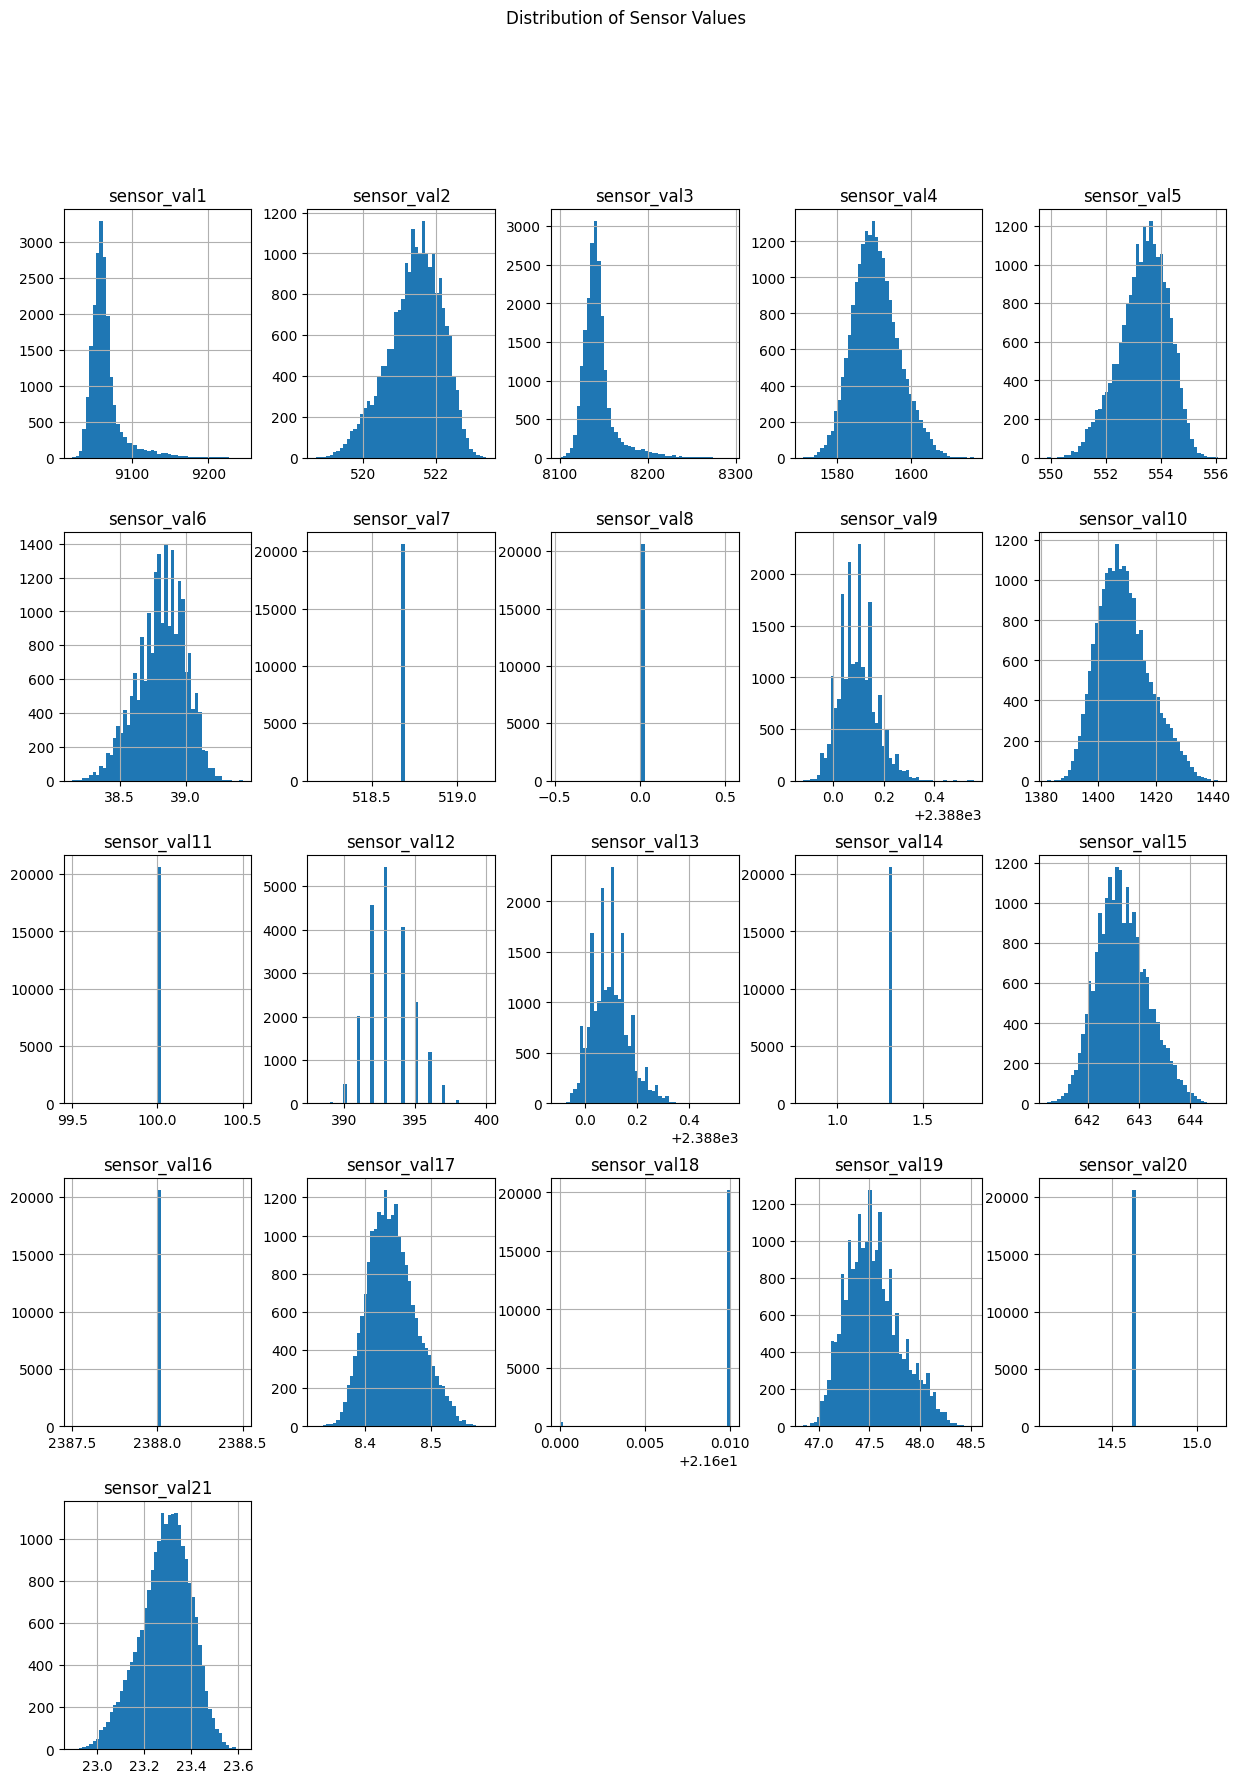

In [601]:
# import matplotlib.pyplot as plt

#histogram for each sensor val
dataset1[[f'sensor_val{i+1}' for i in range(21)]].hist(bins=50, figsize=(15, 20))
plt.suptitle('Distribution of Sensor Values')
plt.show()

In this visualization, each histogram represents the distribution of values captured by one of the 21 sensors in the dataset. It shows how frequently different values occur for each sensor. Histograms are useful for understanding the shape of data distributions but they can also help in spotting any unusual patterns, like data that is skewed or contains outliers which is important for deciding how to prepare the data for analysis. This might involve adjusting the scale of values or removing data points that are far from the norm.

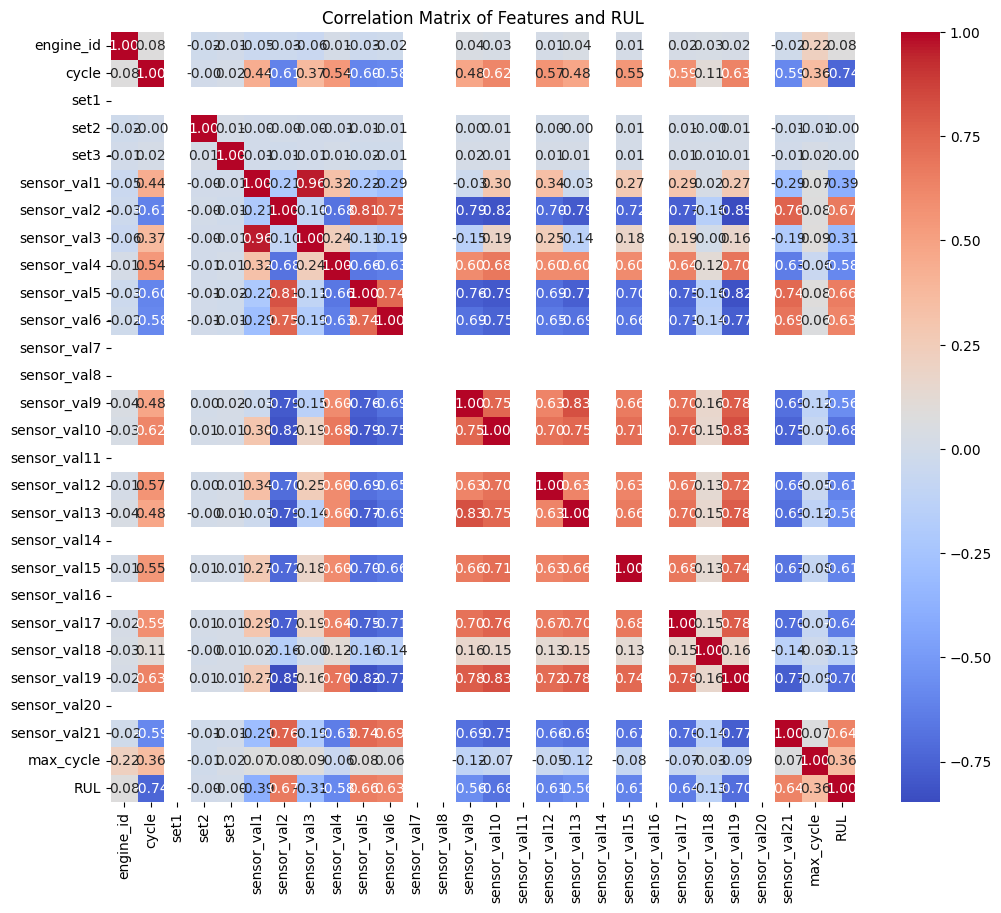

In [602]:
# import seaborn as sns

# Correlation matrix
correlation_matrix = dataset1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and RUL')
plt.show()


This correlation matrix helps us find which features are most linked to RUL, making them useful for predicting outcomes in models. It also helps spot multicollinearity, where high correlations between features can cause problems like overfitting or giving too much weight to certain features in the model.

In [603]:
# Analyse the correlation of RUL with other features
correlation_rul = correlation_matrix['RUL'].sort_values(ascending=False)
correlation_rul

RUL             1.000000
sensor_val2     0.671983
sensor_val5     0.657223
sensor_val21    0.635662
sensor_val6     0.629428
max_cycle       0.363152
engine_id       0.078753
set3           -0.001948
set2           -0.003198
sensor_val18   -0.128348
sensor_val3    -0.306769
sensor_val1    -0.390102
sensor_val9    -0.562569
sensor_val13   -0.563968
sensor_val4    -0.584520
sensor_val12   -0.606154
sensor_val15   -0.606484
sensor_val17   -0.642667
sensor_val10   -0.678948
sensor_val19   -0.696228
cycle          -0.736241
set1                 NaN
sensor_val7          NaN
sensor_val8          NaN
sensor_val11         NaN
sensor_val14         NaN
sensor_val16         NaN
sensor_val20         NaN
Name: RUL, dtype: float64

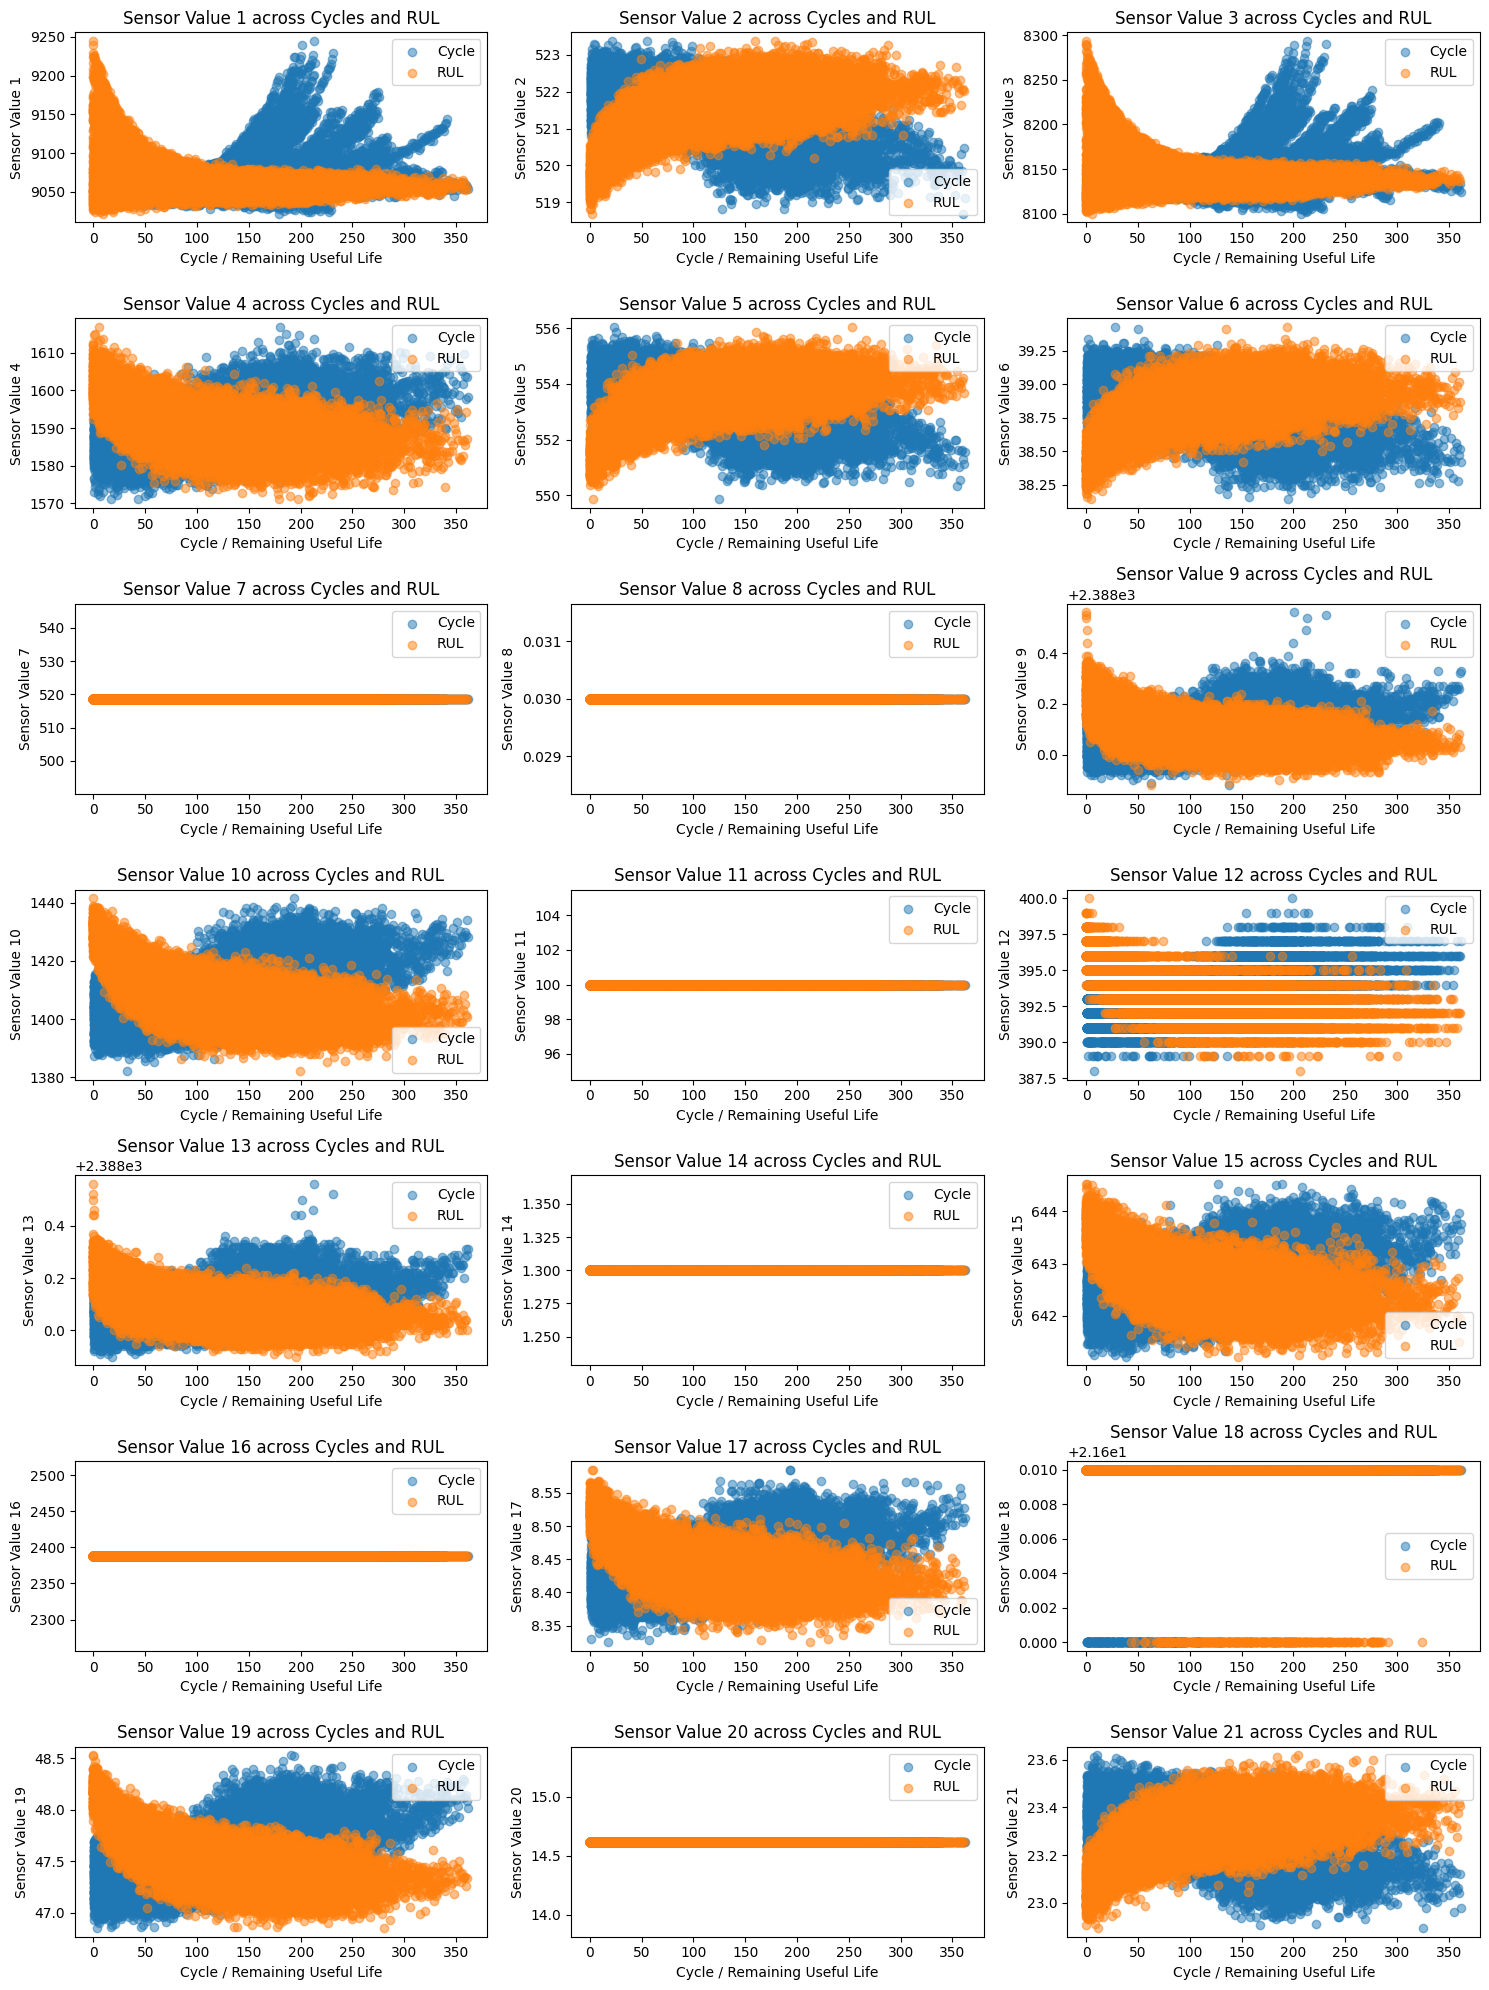

In [604]:
#scatter plot
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.flatten()

# Plot each sensor against cycle and RUL
for i in range(21):
    ax = axs[i]
    sensor_col = f'sensor_val{i+1}'  # Column name for each sensor
    ax.scatter(dataset1['cycle'], dataset1[sensor_col], alpha=0.5, label='Cycle')
    ax.scatter(dataset1['RUL'], dataset1[sensor_col], alpha=0.5, label='RUL')
    ax.set_xlabel('Cycle / Remaining Useful Life')
    ax.set_ylabel(f'Sensor Value {i+1}')
    ax.set_title(f'Sensor Value {i+1} across Cycles and RUL')
    ax.legend()

plt.tight_layout()
plt.show()


In this visualisation, the scatter plot is used to visually explore how Sensor Values behaves concerning 'cycle' and 'RUL' in the dataset. It is essential for quickly understanding relationships between variables like sensor readings and time-related metrics such as 'Cycle' or 'RUL'. It help identify patterns, outliers, and correlations visually, aiding in feature selection for predictive models.

In [605]:
# Checking for missing values in the dataset
dataset1.isnull().sum()

engine_id       0
cycle           0
set1            0
set2            0
set3            0
sensor_val1     0
sensor_val2     0
sensor_val3     0
sensor_val4     0
sensor_val5     0
sensor_val6     0
sensor_val7     0
sensor_val8     0
sensor_val9     0
sensor_val10    0
sensor_val11    0
sensor_val12    0
sensor_val13    0
sensor_val14    0
sensor_val15    0
sensor_val16    0
sensor_val17    0
sensor_val18    0
sensor_val19    0
sensor_val20    0
sensor_val21    0
max_cycle       0
RUL             0
dtype: int64

In [606]:
# generate a feature  for the remaining cycles for each cycle based on the max cycle number for each engine id in dataset
dataset1['RUL'] = dataset1['max_cycle'] - dataset1['cycle']
dataset1.shape

(20631, 28)

In [607]:
# Dropping colun not useful fro training
features = dataset1.drop(columns=['RUL', 'engine_id', 'max_cycle' ])
target = dataset1['RUL']

In [608]:
target.shape, features.shape

((20631,), (20631, 25))

### Test and Training Split

In [609]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((4127, 25), (16504, 25), (4127,), (16504,))

### RFM Training

In [610]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error

# base model
model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2,random_state=42)
model.fit(X_train, y_train)
# Predict RUL on the test data
y_pred = model.predict(X_test)
y_pred

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error
rmse_scorer = make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=rmse_scorer)



From here it will show most of the things -ve coz I did `greater_is_better=False` above.

In [ ]:
# Output 
print("Cross-validation scores:", scores)
print("Mean RMSE:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [-36.18619294 -36.03045925 -36.86547008 -35.47739829 -36.59264305]
Mean RMSE: -36.23043272355331
Standard deviation: 0.4782209060199399


In [ ]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor

# Get the feature importances
importances = model.feature_importances_
# CreateDataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort DataFrame by importance: descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

         Feature  Importance
0          cycle    0.555699
22  sensor_val19    0.144818
4    sensor_val1    0.041984
13  sensor_val10    0.038965
5    sensor_val2    0.030839
6    sensor_val3    0.023506
8    sensor_val5    0.022436
20  sensor_val17    0.019959
24  sensor_val21    0.018742
18  sensor_val15    0.017787
7    sensor_val4    0.017482
2           set2    0.014035
9    sensor_val6    0.013920
16  sensor_val13    0.013304
12   sensor_val9    0.012668
3           set3    0.008612
15  sensor_val12    0.004953
21  sensor_val18    0.000290
10   sensor_val7    0.000000
11   sensor_val8    0.000000
1           set1    0.000000
14  sensor_val11    0.000000
17  sensor_val14    0.000000
19  sensor_val16    0.000000
23  sensor_val20    0.000000


### Gridsearch

In [ ]:
# define grid search
param_grid = {
    'n_estimators': [70, 80, 90, 100],
    'ccp_alpha':  [0],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'max_features': [1],
    'max_depth' : [None],
    'random_state' : [18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': True, 'ccp_alpha': 0, 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 18}


In [ ]:
## Evaluate model with best parameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

# cross-validation
scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=rmse_scorer)
print("Cross-validation scores:", scores)
print("Mean RMSE:", scores.mean())
print("Standard deviation:", scores.std())
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation scores: [-37.52944126 -37.41651809 -37.77919111 -37.09710171 -37.85716029]
Mean RMSE: -37.53588249051777
Standard deviation: 0.27174857305251404
Mean Squared Error: 1353.0047522595105
Root Mean Squared Error: 36.78321291376693
Mean Absolute Error: 26.59528349890962


### Random Search

In [ ]:
# random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(70, 100),
    'ccp_alpha':  [0],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'max_features': [1],
    'max_depth' : [None],
    'random_state' : [18],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True]
}

# Perform
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Output
print("Best parameters:", random_search.best_params_)


Best parameters: {'bootstrap': True, 'ccp_alpha': 0, 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 94, 'random_state': 18}


In [ ]:
model = random_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

# cross-validation
scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=rmse_scorer)
print("Cross-validation scores:", scores)
print("Mean RMSE:", scores.mean())
print("Standard deviation:", scores.std())
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation scores: [-37.4356366  -37.38317512 -37.99882567 -37.25986526 -37.96005268]
Mean RMSE: -37.60751106363587
Standard deviation: 0.3092370500228183
Mean Squared Error: 1377.996077019445
Root Mean Squared Error: 37.12136954665662
Mean Absolute Error: 26.82357384950022


Not considering the above one

In [ ]:
# random search
param_dist = {
    'n_estimators': [900, 920, 930, 940],
    'max_depth': [10, None],
    'max_samples': [1,None],
    'max_features': ['sqrt', 'log2', 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters:", random_search.best_params_)


/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

Best parameters: {'n_estimators': 930, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [ ]:
model = random_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

# cross-validation
scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=rmse_scorer)
print("Cross-validation scores:", scores)
print("Mean RMSE:", scores.mean())
print("Standard deviation:", scores.std())
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

    

/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation scores: [-35.86000869 -35.86048036 -36.2368349  -35.30692924 -36.33765864]
Mean RMSE: -35.92038236471215
Standard deviation: 0.36271742934879436
Mean Squared Error: 1252.6197057526724
Root Mean Squared Error: 35.3923679025955
Mean Absolute Error: 25.18791032279032


## 1.2 Prediction

In [ ]:
# Load data
dataset2 = pd.read_csv('DataSchedule-2.csv')
dataset2

,engine_id,cycle,set1,set2,set3,sensor_val1,sensor_val2,sensor_val3,sensor_val4,sensor_val5,...,sensor_val12,sensor_val13,sensor_val14,sensor_val15,sensor_val16,sensor_val17,sensor_val18,sensor_val19,sensor_val20,sensor_val21
0,1,1,100.0,0.0023,0.0003,9050.17,521.72,8125.55,1585.29,553.90,...,392,2388.04,1.3,643.02,2388,8.4052,21.61,47.20,14.62,23.3735
1,1,2,100.0,-0.0027,-0.0003,9054.42,522.16,8139.62,1588.45,554.85,...,393,2388.01,1.3,641.71,2388,8.3803,21.61,47.50,14.62,23.3916
2,1,3,100.0,0.0003,0.0001,9056.96,521.97,8130.10,1586.94,554.11,...,393,2388.05,1.3,642.46,2388,8.4441,21.61,47.50,14.62,23.4166
3,1,4,100.0,0.0042,0.0000,9045.29,521.38,8132.90,1584.12,554.07,...,391,2388.03,1.3,642.44,2388,8.3917,21.61,47.28,14.62,23.3737
4,1,5,100.0,0.0014,0.0000,9044.55,522.15,8129.54,1587.19,554.16,...,390,2388.01,1.3,642.51,2388,8.4031,21.61,47.31,14.62,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,100.0,0.0049,0.0000,9142.37,520.69,8213.28,1599.45,553.41,...,394,2388.02,1.3,643.24,2388,8.4715,21.61,47.69,14.62,23.1974
13092,100,195,100.0,-0.0011,-0.0001,9140.68,521.05,8210.85,1595.69,553.22,...,395,2388.05,1.3,643.22,2388,8.4512,21.61,47.60,14.62,23.2771
13093,100,196,100.0,-0.0006,-0.0003,9146.81,521.18,8217.24,1593.15,553.04,...,395,2388.11,1.3,643.44,2388,8.4569,21.61,47.57,14.62,23.2051
13094,100,197,100.0,-0.0038,0.0001,9148.85,521.33,8220.48,1594.99,553.37,...,395,2388.07,1.3,643.26,2388,8.4711,21.61,47.61,14.62,23.2699


In [ ]:
# drop engine id
drop_eid = dataset2.drop(columns=['engine_id'])
# Use the best model to predict the RUL for the dataset2, make the 'RUL' in integer format
pred_rul = model.predict(drop_eid)
pred_rul = pred_rul.astype(int)
pred_rul
# Combine dataset2_drop_id with the engine_id
dataset2['RUL'] = pred_rul
dataset2


,engine_id,cycle,set1,set2,set3,sensor_val1,sensor_val2,sensor_val3,sensor_val4,sensor_val5,...,sensor_val13,sensor_val14,sensor_val15,sensor_val16,sensor_val17,sensor_val18,sensor_val19,sensor_val20,sensor_val21,RUL
0,1,1,100.0,0.0023,0.0003,9050.17,521.72,8125.55,1585.29,553.90,...,2388.04,1.3,643.02,2388,8.4052,21.61,47.20,14.62,23.3735,198
1,1,2,100.0,-0.0027,-0.0003,9054.42,522.16,8139.62,1588.45,554.85,...,2388.01,1.3,641.71,2388,8.3803,21.61,47.50,14.62,23.3916,208
2,1,3,100.0,0.0003,0.0001,9056.96,521.97,8130.10,1586.94,554.11,...,2388.05,1.3,642.46,2388,8.4441,21.61,47.50,14.62,23.4166,196
3,1,4,100.0,0.0042,0.0000,9045.29,521.38,8132.90,1584.12,554.07,...,2388.03,1.3,642.44,2388,8.3917,21.61,47.28,14.62,23.3737,198
4,1,5,100.0,0.0014,0.0000,9044.55,522.15,8129.54,1587.19,554.16,...,2388.01,1.3,642.51,2388,8.4031,21.61,47.31,14.62,23.4130,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,100.0,0.0049,0.0000,9142.37,520.69,8213.28,1599.45,553.41,...,2388.02,1.3,643.24,2388,8.4715,21.61,47.69,14.62,23.1974,26
13092,100,195,100.0,-0.0011,-0.0001,9140.68,521.05,8210.85,1595.69,553.22,...,2388.05,1.3,643.22,2388,8.4512,21.61,47.60,14.62,23.2771,27
13093,100,196,100.0,-0.0006,-0.0003,9146.81,521.18,8217.24,1593.15,553.04,...,2388.11,1.3,643.44,2388,8.4569,21.61,47.57,14.62,23.2051,30
13094,100,197,100.0,-0.0038,0.0001,9148.85,521.33,8220.48,1594.99,553.37,...,2388.07,1.3,643.26,2388,8.4711,21.61,47.61,14.62,23.2699,26


In [ ]:
dataset3 = pd.read_csv('RUL_consultancy_predictions_A3-2.csv')
dataset3
# delimeter ;
dataset3 = pd.read_csv('RUL_consultancy_predictions_A3-2.csv', delimiter=';')
dataset3
# Convert 'RUL' and 'id' columns to appropriate data types (integers)
dataset3['RUL'] = dataset3['RUL'].astype(int)
dataset3['id'] = dataset3['id'].astype(int)
dataset3



,RUL,id
0,135,1
1,125,2
2,63,3
3,100,4
4,103,5
...,...,...
95,140,96
96,109,97
97,87,98
98,127,99


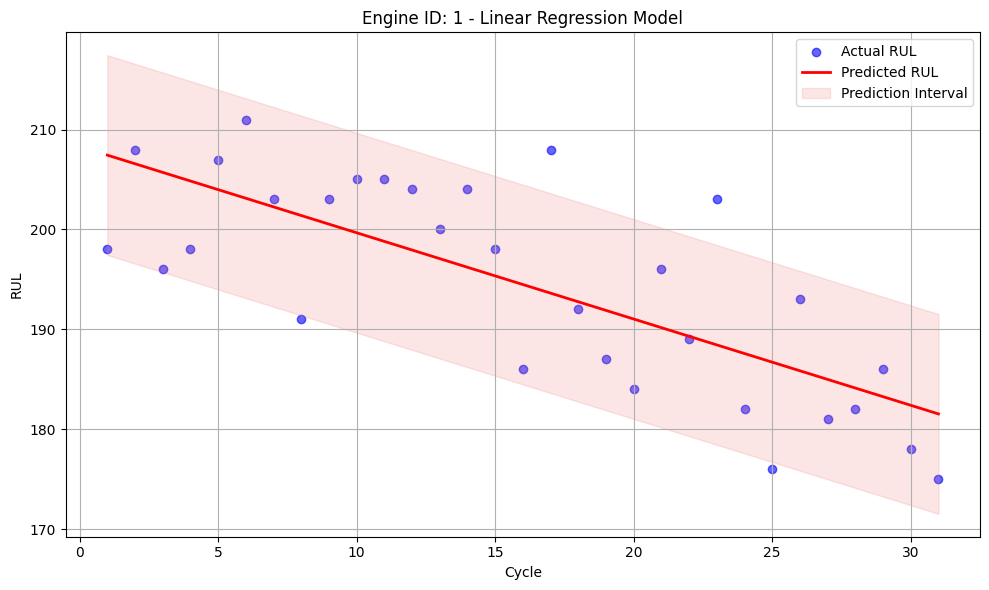

Slope: -0.8637096774193544, Intercept: 208.3032258064516


In [ ]:
# Method Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Function: model and RUL plot for engine
def lr_model_and_plot(engine_id, data):
    engine_data = data[data['engine_id'] == engine_id]
    X = engine_data['cycle'].values.reshape(-1, 1)
    y = engine_data['RUL'].values
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    # Plot graph
    plt.figure(figsize=(10, 6))  
    plt.scatter(X, y, color='blue', label='Actual RUL', marker='o', alpha=0.6)  
    plt.plot(X, predictions, color='red', linestyle='-', linewidth=2, label='Predicted RUL')  
    plt.fill_between(X.flatten(), predictions - 10, predictions + 10, color='lightcoral', alpha=0.2, label='Prediction Interval')  
    plt.title(f'Engine ID: {engine_id} - Linear Regression Model')
    plt.xlabel('Cycle')
    plt.ylabel('RUL')
    plt.legend()
    plt.grid(True)
    plt.tight_layout() 
    plt.show()

    return model.coef_[0], model.intercept_

slope, intercept = lr_model_and_plot(1, dataset2)

print(f"Slope: {slope}, Intercept: {intercept}")

As the plot is -ve, we can compute single RUL value

In [ ]:
# Method: Weighted Average
# Function to compute weighted average for each engine_id
def compute_weighted_avg(group):
    return group['weighted_rul'].sum() / group['weight'].sum()

weighted_rul_df = dataset2.copy()
weighted_rul_df['weight'] = weighted_rul_df['cycle'] / weighted_rul_df.groupby('engine_id')['cycle'].transform('max')
weighted_rul_df['weighted_rul'] = weighted_rul_df['RUL'] * weighted_rul_df['weight']
weighted_avg_rul = weighted_rul_df.groupby('engine_id').apply(compute_weighted_avg).reset_index()
weighted_avg_rul.columns = ['id', 'RUL']
weighted_avg_rul['RUL'] = weighted_avg_rul['RUL'].round().astype(int)
merged_results = pd.merge(weighted_avg_rul, dataset3, on='id', how='inner', suffixes=('_predicted', '_consultancy'))

print(merged_results.head())

   id  RUL_predicted  RUL_consultancy
0   1            190              135
1   2            164              125
2   3            108               63
3   4            126              100
4   5            132              103


/var/folders/wv/2mp6jk197xv_d42688pj82y00000gn/T/ipykernel_28421/341637080.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_rul = weighted_rul_df.groupby('engine_id').apply(compute_weighted_avg).reset_index()


In [ ]:
# Extract the RUL columns
rul_predicted = merged_results['RUL_predicted']
rul_consultancy = merged_results['RUL_consultancy']

# Calculate metrics
mae = mean_absolute_error(rul_consultancy, rul_predicted)
rmse = mean_squared_error(rul_consultancy, rul_predicted, squared=False)
mse = mean_squared_error(rul_consultancy, rul_predicted)

# Output
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)


Mean Absolute Error: 46.21
Root Mean Squared Error: 52.99065955430259
Mean Squared Error: 2808.01


/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


below is for LR 

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming dataset2 is already defined DataFrame with columns 'engine_id', 'cycle', and 'RUL'
def lr_predict(data):
    engine_ids = data['engine_id'].unique()
    predictions = []
    
    for engine_id in engine_ids:
        engine_data = data[data['engine_id'] == engine_id]
        X = engine_data['cycle'].values.reshape(-1, 1)
        y = engine_data['RUL'].values
        model = LinearRegression()
        model.fit(X, y)
        last_cycle = engine_data['cycle'].max()
        pred_rul = model.predict([[last_cycle]])
        predictions.append([engine_id, int(pred_rul[0])])
    
    return pd.DataFrame(predictions, columns=['engine_id', 'RUL'])

# Example usage:
lr_predictions = lr_predict(dataset2)
lr_predictions

# Merge the datasets on the 'engine_id' column
merged_data = pd.merge(lr_predictions, dataset3, left_on='engine_id', right_on='id', how='inner', suffixes=('_predicted', '_consultancy')).drop(columns=['id'])

merged_data

,engine_id,RUL_predicted,RUL_consultancy
0,1,181,135
1,2,152,125
2,3,67,63
3,4,92,100
4,5,102,103
...,...,...,...
95,96,131,140
96,97,92,109
97,98,79,87
98,99,139,127


In [ ]:
# Extract the RUL columns
rul_predicted = merged_data['RUL_predicted']
rul_consultancy = merged_data['RUL_consultancy']

# Calculate metrics
mae = mean_absolute_error(rul_consultancy, rul_predicted)
rmse = mean_squared_error(rul_consultancy, rul_predicted, squared=False)
mse = mean_squared_error(rul_consultancy, rul_predicted)

# Output
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)


Mean Absolute Error: 19.0
Root Mean Squared Error: 23.473389188611005
Mean Squared Error: 551.0


/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LR has less error in all metrics

In [ ]:
# Perform statistical tests paired with t-test
t_stat, p_value = ttest_rel(rul_consultancy, lr_predictions['RUL'])

# Output
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -3.6069747629352418
P-value: 0.00048755943031779224


In [ ]:
# Save prediction to a CSV file
lr_predictions.to_csv('lr_predictions.csv', index=False)

# 2. Optimization Task

## 2.1 Genetic Algorithm 

In [611]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import time

In [612]:
# read lr_predictions.csv and copy it to a new DataFrame
predictions = pd.read_csv('lr_predictions.csv')
predictions_copy = predictions.copy()
predictions_copy


,engine_id,RUL
0,1,181
1,2,152
2,3,67
3,4,92
4,5,102
...,...,...
95,96,131
96,97,92
97,98,79
98,99,139


In [613]:
# In this task, the goal is to develop a maintenance schedule for the engines in data set 2. The output of Task 1.2 should be a list that contains a predicted RUL for each engine in data set 2. These predicted values will now be used as input in order to allocate teams of workers to perform maintenance.

In [614]:
# We want to allocate workers to different engines in order to perform maintenance. Workers perform maintenance in teams, and teams can only work on one engine at a time. Also, two teams cannot work on the same engine simultaneously. There are different types of teams: teams of type A and teams of type B. There are G teams in total. In our case, assume that there are G = 4 teams: 2 teams of type A and 2 teams of type B. Assume that teams T1,T3 are type A, and teams T2,T4 are type B. The engines that need maintenance are numbered with indices from the set M= {1,...,M}, with M being the total number of engines. Teams of type A need μAj days to perform maintenance on engine j ∈ M, and teams of type B need μBj days. Teams of type A are more efficient, as μAj < μBj ∀j ∈M. In our case, M = 100. The values for μAj ,j ∈ M are as follows: μAj = 4,j ∈ {1,2,...,20}, (ii) μAj = 3,j ∈ {21,22,...,55}, (iii) μAj = 2,j ∈ {56,57,...,80}, and (iv) μAj = 8,j ∈ {81,82,...,100}. The values for μBj ,j ∈ M are as follows: μBj = μAj + 1,j ∈ {1,2,...,25}, (ii) μBj = μAj + 2,j ∈ {26,27,...,70}, and (iii) μBj = μAj + 1,j ∈{71,72,...,100}.

In [615]:
# Define the total number of engines
M = 100
# Define the number of teams
G = 4
# Define the time horizon
T = 30
# Define the maximum daily penalty cost
MAX_DAILY_COST = 250



# Initialize lists to store μAj and μBj values for each engine
mu_A = [0] * M
mu_B = [0] * M
engine_costs = []

# Populate engine_costs with values according to the given rules
for j in range(1, M + 1):
    if j <= 20:
        engine_costs.append(4)
    elif 21 <= j < 31:
        engine_costs.append(3)
    elif 31 <= j < 46:
        engine_costs.append(2)
    elif 46 <= j < 81:
        engine_costs.append(5)
    else:
        engine_costs.append(6)

# Populate mu_A with values according to the given rules
for j in range(1, M + 1):
    if 1 <= j <= 20:
        mu_A[j-1] = 4
    elif 21 <= j <= 55:
        mu_A[j-1] = 3
    elif 56 <= j <= 80:
        mu_A[j-1] = 2
    elif 81 <= j <= 100:
        mu_A[j-1] = 8

# Populate mu_B based on mu_A values and the given rules
for j in range(1, M + 1):
    if 1 <= j <= 25:
        mu_B[j-1] = mu_A[j-1] + 1
    elif 26 <= j <= 70:
        mu_B[j-1] = mu_A[j-1] + 2
    elif 71 <= j <= 100:
        mu_B[j-1] = mu_A[j-1] + 1

# Print results
print("Engine Costs:", engine_costs)
print("μA values:", mu_A)
print("μB values:", mu_B)


Engine Costs: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
μA values: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
μB values: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [616]:
# Define the number of teams of type A and type B
G_A = 2
G_B = 2

# Define the teams of type A and type B
teams_A = ['T1', 'T3']
teams_B = ['T2', 'T4']

# Define the total number of teams
teams = teams_A + teams_B

# Output the teams
print("Teams of type A:", teams_A)
print("Teams of type B:", teams_B)
print("All teams:", teams)


Teams of type A: ['T1', 'T3']
Teams of type B: ['T2', 'T4']
All teams: ['T1', 'T3', 'T2', 'T4']


In [617]:
# 2.1 Genetic Algorithm - First, you are going to develop a Genetic Algorithm to solve the optimization problem. Company X is going to allocate teams to different engines in order to perform maintenance. Assume that we are currently at day t = 1 and that company X wants to allocate teams to engines in order to minimize penalty costs for a planning horizon of T = 30. In other words, company X wants to allocate teams to engines that have a predicted safety due date of less than 30.
# 2.1.1 Write a Genetic Algorithm that solves the problem for company X

In [618]:
# Create the creator for the fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Function to create a feasible individual
def create_individual():
    individual = []
    for engine_id in range(1, len(predictions_copy) + 1):
        if predictions_copy.loc[predictions_copy['engine_id'] == engine_id, 'RUL'].values[0] < T:
            team_type = random.choice(['A', 'B'])
            start_day = random.randint(1, T)
            individual.append((engine_id, team_type, start_day))
    return individual

# Function to convert an individual to a schedule and return DataFrame; 'RUL': RUL,'Engine_id': engine_id,'Team': team_type,'Start_date': start_day,'End_date': end_day,'Penalty_cost': penalty_cost,'Total_penalty_cost': total_penalty_cost. 
def individual_to_schedule(individual):
    schedule = []
    total_penalty_cost = 0
    for engine_id, team_type, start_day in individual:
        predicted_rul = predictions_copy.loc[predictions_copy['engine_id'] == engine_id, 'RUL'].values[0]
        if team_type == 'A':
            maintenance_time = mu_A[engine_id - 1]
        else:
            maintenance_time = mu_B[engine_id - 1]
        end_day = start_day + maintenance_time - 1
        if end_day > predicted_rul:
            penalty_cost = (end_day - predicted_rul) * MAX_DAILY_COST
            total_penalty_cost += penalty_cost
        schedule.append({'RUL': predicted_rul, 'Engine_id': engine_id, 'Team': team_type, 'Start_date': start_day, 'End_date': end_day, 'Penalty_cost': penalty_cost, 'Total_penalty_cost': total_penalty_cost})
    return pd.DataFrame(schedule), total_penalty_cost

# Function to calculate penalty cost per engine based on maintenance schedule
def calculate_penalty_cost(engine_id, team_type, start_day):
    predicted_rul = predictions_copy.loc[predictions_copy['engine_id'] == engine_id, 'RUL'].values[0]
    if team_type == 'A':
        maintenance_time = mu_A[engine_id - 1]
    else:
        maintenance_time = mu_B[engine_id - 1]
    end_day = start_day + maintenance_time - 1
    if end_day > predicted_rul:
        return (end_day - predicted_rul) * MAX_DAILY_COST
    return 0

# Fitness function: total penalty cost for the individuaL
def calculate_fitness(individual):
    total_penalty_cost = 0
    for engine_id, team_type, start_day in individual:
        penalty_cost = calculate_penalty_cost(engine_id, team_type, start_day)
        total_penalty_cost += penalty_cost
    return (1 / (1 + total_penalty_cost),)

# Feasibility function: check if the individual satisfies all constraints
def is_feasible(individual):
    engine_ids = [engine_id for engine_id, _, _ in individual]
    return len(engine_ids) == len(set(engine_ids))

def cxTwoPoint(ind1, ind2):
    size = min(len(ind1), len(ind2))
    print(f"Individual lengths: {len(ind1)}, {len(ind2)}")
    print(f"Size: {size}")
    
    cxpoint1 = random.randint(1, size)
    cxpoint2 = random.randint(1, size - 1)
    print(f"Crossover points: {cxpoint1}, {cxpoint2}")
    
    if cxpoint2 >= cxpoint1:
        ind1[cxpoint1:cxpoint2], ind2[cxpoint1:cxpoint2] = ind2[cxpoint1:cxpoint2], ind1[cxpoint1:cxpoint2]

    return ind1, ind2


/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/vishalsehgal/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [619]:

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.decorate("evaluate", tools.DeltaPenalty(is_feasible, 10000))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.7)
toolbox.register("select", tools.selTournament, tournsize=3)


# Create intial population
population = toolbox.population(n=1000)
# Define statistics and hall of fame
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
hof = tools.HallOfFame(1)

# Number of generations
num_generations = 70

# Run the genetic algorithm§
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.8, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof)

# Print best individual and its fitness values
best_individual = hof[0]
best_schedule_df = individual_to_schedule(best_individual)
best_fitness = best_individual.fitness.values
print("Best individual is:", best_individual)


gen	nevals	avg        	min        	max       
0  	1000  	0.000133946	4.34764e-05	0.00398406
1  	853   	8.03864e-05	3.96024e-05	0.000333222
2  	833   	2820       	3.66959e-05	10000      
3  	829   	3570       	3.5397e-05 	10000      
4  	843   	3870       	3.38972e-05	10000      
5  	856   	4460       	3.47814e-05	10000      
6  	879   	4710       	3.25193e-05	10000      
7  	833   	4370       	3.14951e-05	10000      
8  	836   	4740       	3.14951e-05	10000      
9  	851   	4740       	3.14951e-05	10000      
10 	865   	4780       	3.14951e-05	10000      
11 	801   	4740       	3.1249e-05 	10000      
12 	833   	4540       	3.05334e-05	10000      
13 	859   	4400       	3.03021e-05	10000      
14 	834   	4310       	3.03021e-05	10000      
15 	820   	4350       	3.00743e-05	10000      
16 	862   	5300       	2.98499e-05	10000      
17 	846   	5420       	2.96288e-05	10000      
18 	861   	5490       	2.87762e-05	10000      
19 	850   	5240       	2.87762e-05	10000      
20 	840   	5240

In [620]:
print("\nBest Schedule:")
print(best_schedule_df)


Best Schedule:
(   RUL  Engine_id Team  Start_date  End_date  Penalty_cost  Total_penalty_cost
0   29         24    B          30        33          1000                1000
1   15         56    B          30        33          4500                5500
2   20         81    B          30        38          4500               10000
3   29         68    B          30        33          1000               11000
4   16         66    B          30        33          4250               15250
5   20         31    B          30        34          3500               18750
6   26         76    B          30        32          1500               20250
7   12         35    B          30        34          5500               25750
8   21         92    B          30        38          4250               30000
9   16         91    B          30        38          5500               35500, 35500)


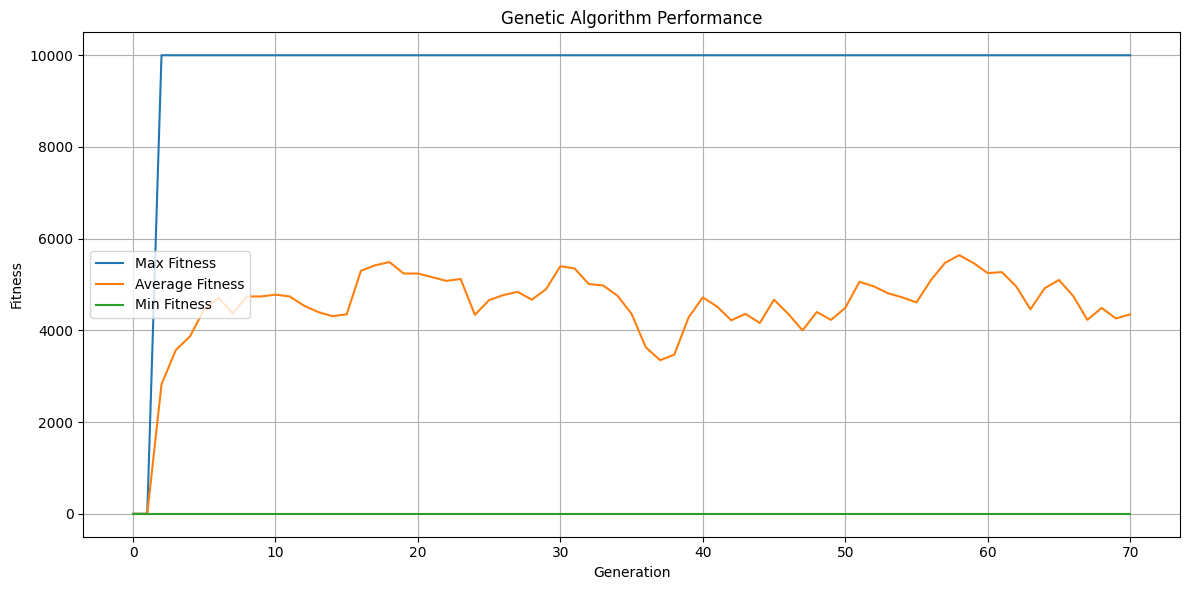

In [623]:
# historical data
gen = logbook.select("gen")
max_val = logbook.select("max")
avg_val = logbook.select("avg")
min_val = logbook.select("min")

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(gen, max_val, label='Max Fitness')
plt.plot(gen, avg_val, label='Average Fitness')
plt.plot(gen, min_val, label='Min Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
